# Modeling the energy production and consumption

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import keras
from keras.models import Sequential
from keras.layers import Dense, Input

In [34]:
df = pd.read_csv("data_clean.csv")

In [35]:
df

,is_consumption,eic_count,installed_capacity,day,weekday,month,year,sin(dayofyear),cos(dayofyear),sin(hour),cos(hour),target
0,0,6.0,324.2,3,5,9,2021,-0.882679,-0.469977,0.000000,1.000000,0.000
1,1,6.0,324.2,3,5,9,2021,-0.882679,-0.469977,0.000000,1.000000,136.281
2,0,6.0,324.2,3,5,9,2021,-0.882679,-0.469977,0.258819,0.965926,0.000
3,1,6.0,324.2,3,5,9,2021,-0.882679,-0.469977,0.258819,0.965926,145.417
4,0,6.0,324.2,3,5,9,2021,-0.882679,-0.469977,0.500000,0.866025,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...
30515,1,17.0,540.0,31,3,5,2023,0.522133,-0.852864,-0.707107,0.707107,132.470
30516,0,17.0,540.0,31,3,5,2023,0.522133,-0.852864,-0.500000,0.866025,0.002
30517,1,17.0,540.0,31,3,5,2023,0.522133,-0.852864,-0.500000,0.866025,114.667
30518,0,17.0,540.0,31,3,5,2023,0.522133,-0.852864,-0.258819,0.965926,0.000


In [36]:
df.columns

Index(['is_consumption', 'eic_count', 'installed_capacity', 'day', 'weekday',
       'month', 'year', 'sin(dayofyear)', 'cos(dayofyear)', 'sin(hour)',
       'cos(hour)', 'target'],
      dtype='object')

In [37]:
features = [
    'installed_capacity', 
    'day', 
    'weekday',
    'month', 
    'year', 
    'sin(dayofyear)', 
    'cos(dayofyear)', 
    'sin(hour)',
    'cos(hour)'
]

### Energy production modeling

In [38]:
df_production = df.loc[df.is_consumption==0].drop(columns="is_consumption").reset_index(drop=True)

In [39]:
df_production

,eic_count,installed_capacity,day,weekday,month,year,sin(dayofyear),cos(dayofyear),sin(hour),cos(hour),target
0,6.0,324.2,3,5,9,2021,-0.882679,-0.469977,0.000000,1.000000,0.000
1,6.0,324.2,3,5,9,2021,-0.882679,-0.469977,0.258819,0.965926,0.000
2,6.0,324.2,3,5,9,2021,-0.882679,-0.469977,0.500000,0.866025,0.000
3,6.0,324.2,3,5,9,2021,-0.882679,-0.469977,0.707107,0.707107,0.000
4,6.0,324.2,3,5,9,2021,-0.882679,-0.469977,0.866025,0.500000,0.000
...,...,...,...,...,...,...,...,...,...,...,...
15255,17.0,540.0,31,3,5,2023,0.522133,-0.852864,-0.965926,0.258819,9.685
15256,17.0,540.0,31,3,5,2023,0.522133,-0.852864,-0.866025,0.500000,3.365
15257,17.0,540.0,31,3,5,2023,0.522133,-0.852864,-0.707107,0.707107,0.379
15258,17.0,540.0,31,3,5,2023,0.522133,-0.852864,-0.500000,0.866025,0.002


In [40]:
def split__train_val_test_sets(df):
    df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
    df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)
    
    
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    y_train = df_train.target.values
    y_val = df_val.target.values
    y_test = df_test.target.values
    
    del df_train['target']
    del df_val['target']
    del df_test['target']
    return df_train, df_test, df_val, y_train, y_test, y_val

In [41]:
df_train, df_test, df_val, y_train, y_test, y_val = split__train_val_test_sets(df_production)

In [42]:
df_train

,eic_count,installed_capacity,day,weekday,month,year,sin(dayofyear),cos(dayofyear),sin(hour),cos(hour)
0,6.0,330.2,4,3,5,2022,0.848351,-0.529434,9.659258e-01,-2.588190e-01
1,18.0,645.2,22,4,12,2022,-0.170830,0.985301,7.071068e-01,-7.071068e-01
2,16.0,572.2,19,3,4,2023,0.955211,-0.295927,-7.071068e-01,7.071068e-01
3,18.0,645.2,26,6,11,2022,-0.579421,0.815028,-2.588190e-01,-9.659258e-01
4,6.0,324.2,25,4,11,2021,-0.593327,0.804962,-1.000000e+00,-1.836970e-16
...,...,...,...,...,...,...,...,...,...,...
9151,6.0,330.2,31,2,5,2022,0.522133,-0.852864,-7.071068e-01,-7.071068e-01
9152,8.0,388.7,3,7,7,2022,-0.017166,-0.999853,5.000000e-01,8.660254e-01
9153,6.0,324.2,1,2,3,2022,0.857315,0.514793,-7.071068e-01,7.071068e-01
9154,6.0,324.2,19,7,9,2021,-0.977064,-0.212947,1.224647e-16,-1.000000e+00


In [43]:
X_train = df_train[features]
X_val = df_val[features]
X_test = df_test[features]

In [44]:
scaler = StandardScaler()
scaler.fit(X_train)
print(scaler.mean_)

[ 4.66632143e+02  1.58368283e+01  4.01769332e+00  6.42944517e+00
  2.02205352e+03  3.21542989e-02  1.23755677e-01 -6.24690105e-04
  2.35722978e-03]


In [45]:
X_train_scaled = scaler.transform(X_train)

### Neural Network

https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/

In [87]:
def get_model(n_inputs, n_outputs):
    model = Sequential()
    model.add(Dense(64, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
    model.add(Dense(32, input_dim=64, kernel_initializer='he_uniform', activation='relu'))
    model.add(Dense(n_outputs, activation='relu'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
    return model

n_features = len(features)

model = get_model(X_train_scaled.shape[1], 1)

In [88]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                640       
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2753 (10.75 KB)
Trainable params: 2753 (10.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [89]:
history = model.fit(
    X_train_scaled,
    y_train,
    batch_size=1024,
    epochs=8,
#     validation_data=(X_train_scaled, y_train)
)

Epoch 1/8
9/9 [==============================] - 1s 3ms/step - loss: 704.0007 - mse: 704.0007
Epoch 2/8
9/9 [==============================] - 0s 3ms/step - loss: 681.7499 - mse: 681.7499
Epoch 3/8
9/9 [==============================] - 0s 2ms/step - loss: 659.7860 - mse: 659.7860
Epoch 4/8
9/9 [==============================] - 0s 3ms/step - loss: 636.8485 - mse: 636.8485
Epoch 5/8
9/9 [==============================] - 0s 3ms/step - loss: 612.7253 - mse: 612.7253
Epoch 6/8
9/9 [==============================] - 0s 3ms/step - loss: 587.0644 - mse: 587.0644
Epoch 7/8
9/9 [==============================] - 0s 3ms/step - loss: 558.1625 - mse: 558.1625
Epoch 8/8
9/9 [==============================] - 0s 3ms/step - loss: 528.9858 - mse: 528.9858


### Test

In [90]:
X_test_scaled = scaler.transform(X_test)

In [91]:
predictions = model.predict(X_test_scaled)

96/96 [==============================] - 0s 1ms/step


In [92]:
def add_predictions(df,predictions):
    df["prediction"] = predictions
    return df

In [93]:
predictions

array([[8.450582 ],
       [0.       ],
       [4.576785 ],
       ...,
       [5.8352723],
       [2.195039 ],
       [0.       ]], dtype=float32)

In [94]:
y_pred = predictions.reshape(-1)

In [95]:
rng = np.random.RandomState(10)
a = np.hstack((rng.normal(size=1000),
               rng.normal(loc=5, scale=2, size=1000)))

In [96]:
a

array([ 1.3315865 ,  0.71527897, -1.54540029, ...,  5.74446677,
        6.22449239,  8.42055014])

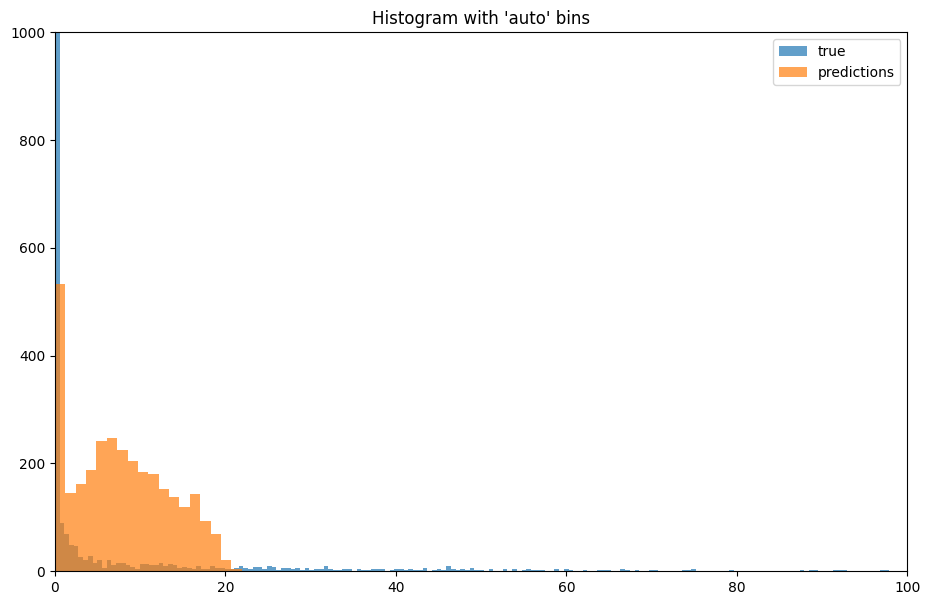

In [114]:
plt.figure(figsize=(11,7))
_ = plt.hist(y_test, bins='auto', alpha=0.7, label="true")  # arguments are passed to np.histogram
_ = plt.hist(y_pred, bins='auto', alpha=0.7, label="predictions")  # arguments are passed to np.histogram
# plt.title("Histogram with 'auto' bins")
# plt.show()
plt.title("Histogram with 'auto' bins")
plt.xlim([0, 100])
plt.ylim([0, 1000])
plt.legend()
plt.show()

In [118]:
y_pred.max()

21.916058

### Summary
- Our predictions are less spread than real values - they are between 0 and 22.
- However, we predict more values to be above 0 that were 0s in reality.
##### Next steps:
- We should add more features to better discriminate the predictions.

In [100]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_pred, y_test)
mse

484.2249529858072

In [115]:
y_test.mean()

9.85657372214941

In [117]:
y_pred.mean()

7.7793818